In [31]:
import numpy as np
import matplotlib.pyplot as plt

from moving_gauss import GaussEstimator

Approximate a function $y(t)$ with $g(t)$, where,

$$g(t) = \mathbf{w}(t) \theta$$

with,

$$ \mathbf{w}(t) = [w_0(t), w_1(t), \dots, w_n(t)] $$

$$ w_i(t) = e ^ \frac{-(t-t_i)^2}{2 \sigma_g} $$

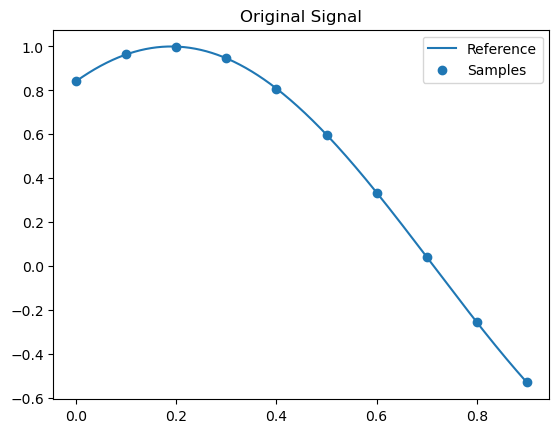

In [32]:
sampling_dt = 0.1
n_samples = 10

integration_per_sample = 100
integration_dt = sampling_dt/integration_per_sample

end_time = sampling_dt*(n_samples-1)

t = np.linspace(0, end_time, integration_per_sample*(n_samples-1)+1)
t_sampled = t[::integration_per_sample]

y = np.sin(3*t+1)
y_sampled = y[::integration_per_sample]

plt.plot(t,y, label="Reference")
plt.scatter(t_sampled, y_sampled, label="Samples")
plt.title("Original Signal")
plt.legend()

plt.show()

Sigma = 0.30000000000000004


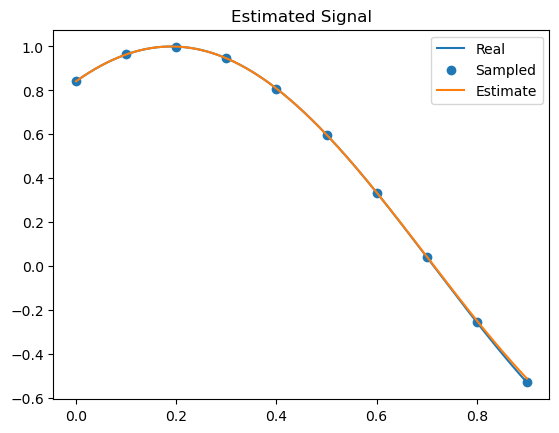

In [33]:
N = 6
d = 6
estimator = GaussEstimator(d, N, sampling_dt)

a = estimator.fit(y_sampled[:N])
y_hat = estimator.estimate(t)

print(f"Sigma = {estimator.sigma}")

plt.plot(t,y, label="Real")
plt.scatter(t_sampled, y_sampled, label="Sampled")
plt.plot(t, y_hat, label="Estimate")
plt.legend()
plt.title("Estimated Signal")

plt.show()

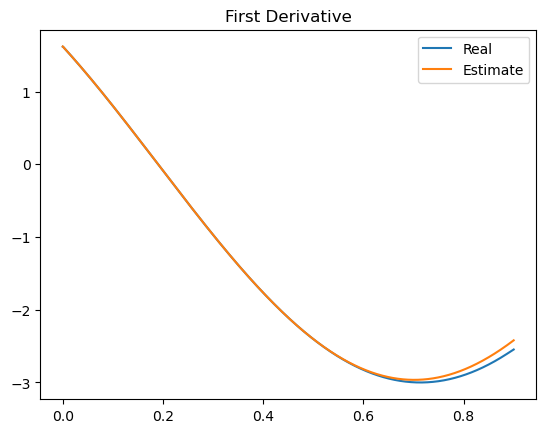

In [34]:
yd = np.gradient(y, integration_dt)
plt.plot(t, yd, label="Real")
plt.plot(t, estimator.differentiate(t, q=1), label="Estimate")
plt.legend()
plt.title("First Derivative")

plt.show()

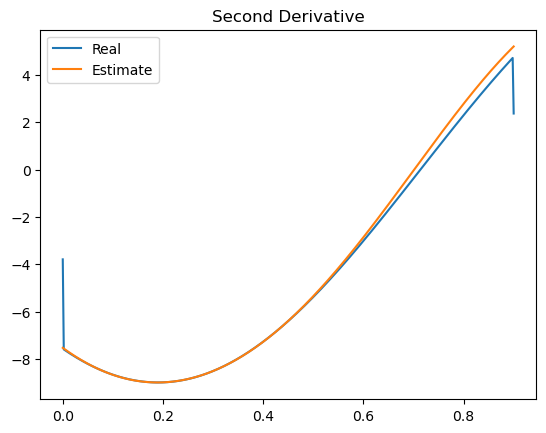

In [35]:
ydd = np.gradient(yd, integration_dt)
plt.plot(t, ydd, label="Real")
plt.plot(t, estimator.differentiate(t, q=2), label="Estimate")
plt.legend()
plt.title("Second Derivative")

plt.show()